## Imports and Setup

In [1]:
from helper_functions import pd, os, shutil
from helper_functions import convert_samples_to_binary, get_column_data_types, print_library_versions, add_id_column, order_columns_by_correlation, organize_photos_in_folders

### Try to get library versions matching the following:

In [2]:
print_library_versions()

pandas version:           1.4.1
matplotlib version:       3.5.1
numpy version:            1.18.5
bitstring version:        3.1.9
joblib version:           1.1.0
PIL version:              8.2.0


## Data Loading and Cleaning

In [3]:
# FIXME - update the filename to point to your dataset
filename = '/mnt/sda1/DDoS.csv'
df = pd.read_csv(filename)

### Spend some time familiarizing yourself with your dataset. Here are some basic commands

In [4]:
df.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS
1,17,2,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS
2,17,2,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS
3,17,1,2,0,2832.0,0.0,1416.0,1416.0,1416.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS
4,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199992 entries, 0 to 199991
Data columns (total 70 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Protocol                     199992 non-null  int64  
 1   Flow Duration                199992 non-null  int64  
 2   Total Fwd Packets            199992 non-null  int64  
 3   Total Backward Packets       199992 non-null  int64  
 4   Total Length of Fwd Packets  199992 non-null  float64
 5   Total Length of Bwd Packets  199992 non-null  float64
 6   Fwd Packet Length Max        199992 non-null  float64
 7   Fwd Packet Length Min        199992 non-null  float64
 8   Fwd Packet Length Mean       199992 non-null  float64
 9   Fwd Packet Length Std        199992 non-null  float64
 10  Bwd Packet Length Max        199992 non-null  float64
 11  Bwd Packet Length Min        199992 non-null  float64
 12  Bwd Packet Length Mean       199992 non-null  float64
 13 

# Data Cleaning

In [9]:
# FIXME - update the function if necessary for the 'name' value
def add_id_column(df: pd.DataFrame, column_name: str) -> pd.DataFrame:
    """
    Adds a new column to a pandas DataFrame with unique identifiers for each value in a specified column.

    Args:
        df (pandas.DataFrame): The DataFrame to modify.
        column_name (str): The name of the column to use for generating unique identifiers.

    Returns:
        pandas.DataFrame: The modified DataFrame with the new 'Id' column.
    """
    if 'Id' not in df.columns:
        df['Id'] = ''

    unique_values = df[column_name].unique().tolist()
    values_dict = {value: 0 for value in unique_values}
    for index, row in df.iterrows():
        value = row[column_name]
        values_dict[value] += 1
        name = str(values_dict[value]) + "-" + value
        df.at[index, 'Id'] = name
    return df

In [11]:
df['Label'].value_counts()

DNS        16666
LDAP       16666
MSSQL      16666
NetBIOS    16666
NTP        16666
Portmap    16666
SNMP       16666
SSDP       16666
Syn        16666
TFTP       16666
UDP        16666
UDPLag     16666
Name: Label, dtype: int64

In [10]:
# FIXME - change the value 'species' to match the 'y' value of your dataset
# This function will give your dataframe an 'id' column which will be used to identify the samples in the dataset
# The 'id' column will be used to name the photos of the samples
classification_id = 'Label'
df = add_id_column(df, classification_id)
df

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label,Id
0,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,1-DNS
1,17,2,2,0,2944.0,0.0,1472.0,1472.0,1472.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,2-DNS
2,17,2,2,0,2944.0,0.0,1472.0,1472.0,1472.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,3-DNS
3,17,1,2,0,2832.0,0.0,1416.0,1416.0,1416.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,4-DNS
4,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,5-DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199987,6,1,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,16662-UDPLag
199988,6,3307134,21,24,1426.0,2834.0,440.0,0.0,67.904762,126.747349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,16663-UDPLag
199989,6,1,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,16664-UDPLag
199990,6,1,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,16665-UDPLag


In [15]:
# drop 0 value columns
zero_cols = df.columns[df.eq(0).all(axis=0)]
df = df.drop(zero_cols, axis=1)
df

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label,Id
0,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,1-DNS
1,17,2,2,0,2944.0,0.0,1472.0,1472.0,1472.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,2-DNS
2,17,2,2,0,2944.0,0.0,1472.0,1472.0,1472.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,3-DNS
3,17,1,2,0,2832.0,0.0,1416.0,1416.0,1416.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,4-DNS
4,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,5-DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199987,6,1,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,16662-UDPLag
199988,6,3307134,21,24,1426.0,2834.0,440.0,0.0,67.904762,126.747349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,16663-UDPLag
199989,6,1,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,16664-UDPLag
199990,6,1,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,16665-UDPLag


In [19]:
df = df.drop('Protocol', axis=1)
df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label,Id
0,1,2,0,2944.0,0.0,1472.0,1472.0,1472.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,1-DNS
1,2,2,0,2944.0,0.0,1472.0,1472.0,1472.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,2-DNS
2,2,2,0,2944.0,0.0,1472.0,1472.0,1472.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,3-DNS
3,1,2,0,2832.0,0.0,1416.0,1416.0,1416.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,4-DNS
4,1,2,0,2944.0,0.0,1472.0,1472.0,1472.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,5-DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199987,1,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,16662-UDPLag
199988,3307134,21,24,1426.0,2834.0,440.0,0.0,67.904762,126.747349,976.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,16663-UDPLag
199989,1,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,16664-UDPLag
199990,1,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,16665-UDPLag


In [20]:
x = df.drop([classification_id, 'Id'], axis=1)
Y = df[classification_id]
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (199992, 64)
Y (199992,)
This value should be True: True


## Image Generation

In [21]:
# FIXME - update `image_directory`` to point to a directory where you want the images to be saved. 
# Change any other constants you want to change
image_directory = "/mnt/sda1/image-results-DDoS"
feature_types = get_column_data_types(x)
# Precision: the number of binary digits to use for each feature (use a power of 2)
precision = 64
# one: the value to use for a 1 in the binary representation (128 is a dark pixel)
one = 128
zero = 0
# num_jobs: the number of jobs to run in parallel (-1 means use all available cores)
n_jobs = -1
# For feature_types, 0 = float, 1 = int, 2 = bool
# Notice mine are all 0's because I only have float values in my dataset, you may have different values
print(feature_types)

[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [23]:
for index, column in enumerate(x.columns):
    print(f"{column}: ",end="")
    if feature_types[index] == 0:
        print("float")
    elif feature_types[index] == 1:
        print("int")
    elif feature_types[index] == 2:
        print("bool")

Flow Duration: int
Total Fwd Packets: int
Total Backward Packets: int
Total Length of Fwd Packets: float
Total Length of Bwd Packets: float
Fwd Packet Length Max: float
Fwd Packet Length Min: float
Fwd Packet Length Mean: float
Fwd Packet Length Std: float
Bwd Packet Length Max: float
Bwd Packet Length Min: float
Bwd Packet Length Mean: float
Bwd Packet Length Std: float
Flow Bytes/s: float
Flow Packets/s: float
Flow IAT Mean: float
Flow IAT Std: float
Flow IAT Max: float
Flow IAT Min: float
Fwd IAT Total: float
Fwd IAT Mean: float
Fwd IAT Std: float
Fwd IAT Max: float
Fwd IAT Min: float
Bwd IAT Total: float
Bwd IAT Mean: float
Bwd IAT Std: float
Bwd IAT Max: float
Bwd IAT Min: float
Fwd Header Length: int
Bwd Header Length: int
Fwd Packets/s: float
Bwd Packets/s: float
Min Packet Length: float
Max Packet Length: float
Packet Length Mean: float
Packet Length Std: float
Packet Length Variance: float
SYN Flag Count: int
RST Flag Count: int
ACK Flag Count: int
URG Flag Count: int
CWE Flag

In [24]:
convert_samples_to_binary(x, df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

Time to convert 199992 samples to binary: 54.286376953125 seconds. Seconds per sample = 0.000271442742475324


## Place Folders into the Correct Categories

In [28]:
def organize_photos_in_folders(image_directory : str, Y : pd.DataFrame) -> None:
    '''
        Organize the photos in the folder into subfolders based on the label
        
        Args:
            image_directory (str): The directory to save the images to.
            Y (pd.DataFrame): The pandas dataframe ids values to be converted to binary.
    '''
    dirs = Y.unique().tolist()
    if not os.path.exists(image_directory + '/data'):
        os.mkdir(image_directory + '/data')
    new_dir = image_directory + '/data/'
    if not os.path.exists(new_dir+'Train/'):
        os.mkdir(new_dir+'Train/')
    for i in dirs:
        i = str(i)
        if not os.path.exists(new_dir+'Train/'+i):
            os.mkdir(new_dir+'Train/'+i)
    total_images = 0
    type_counts = {value: 0 for value in dirs}
    for file in os.listdir(image_directory):
        try:
            dir = file.split("-")[1].split(".")[0]
            type_counts[dir]+=1
        except:
            continue
        shutil.move(f"{image_directory}/{file}", f"{new_dir}Train/{dir}/{file}")
        total_images += 1
    print(total_images)
    print(type_counts)

In [29]:
organize_photos_in_folders(image_directory, Y)

199992
{'DNS': 16666, 'LDAP': 16666, 'MSSQL': 16666, 'NetBIOS': 16666, 'NTP': 16666, 'Portmap': 16666, 'SNMP': 16666, 'SSDP': 16666, 'Syn': 16666, 'TFTP': 16666, 'UDP': 16666, 'UDPLag': 16666}


In [ ]:
#FIXME Upload your photos to the Google Drive Data Folder!

## Train ResNet50
If you used my yaml files where there are two conda environments, this is the stage where you will change to the `keras_gpu` environment. If you used the alternative method, you should be in the correct environment already.

### Once experiments are running, view the live updates on TensorBoard
Run the command `tensorboard --logdir=[your log directory]` in the terminal. 
<br />
<br />
Then, open a browser and navigate to `localhost:6006`.
<br />
<br />
![TensorBoard](./imgs/tensorboard.png)

In [1]:
from resnet import print_dl_versions, train_resnet_model_k_fold, evaluate_on_test_data, plot_metrics

2023-03-09 18:43:07.505697: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
# FIXME - update the values below to match your dataset
# Multiple of 2 such that it is greater than or equal to the number of features you have
img_size = 64
target_size = (img_size,img_size)
# Number of classification types (classes) in your dataset
num_classes = 12
# Number of samples to run through the model before updating the weights
# Higher batch size means more memory is required and training will be faster. Maybe use 64 for larger datasets
batch_size = 32
# Number of times to run through training a model
# Depending on the size of your dataset, you may want to increase/decrease this number
num_folds = 5
# Number of times to run through the entire dataset
number_of_epochs = 100

In [3]:
image_directory = "/mnt/sda1/image-results-DDoS"
new_dir = image_directory + '/data'
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

2023-03-09 18:43:09.077095: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-03-09 18:43:09.077808: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-03-09 18:43:09.114573: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-09 18:43:09.114844: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1080 computeCapability: 6.1
coreClock: 1.7715GHz coreCount: 20 deviceMemorySize: 7.92GiB deviceMemoryBandwidth: 298.32GiB/s
2023-03-09 18:43:09.114863: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-03-09 18:43:09.116255: I tensorflow/stream_executor/platform/d

Fold:  0
Found 159996 images belonging to 12 classes.
Found 39996 images belonging to 12 classes.


2023-03-09 18:43:13.975461: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-09 18:43:13.975485: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-09 18:43:13.975522: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1365] Profiler found 1 GPUs
2023-03-09 18:43:13.976105: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcupti.so.10.1
2023-03-09 18:43:14.044028: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-09 18:43:14.044132: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-09 18:43:14.128915: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-03-09 18:43:14.146661: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 4200000000 Hz


Epoch 1/100


2023-03-09 18:43:17.894707: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-03-09 18:43:18.050491: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-03-09 18:43:18.664947: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2023-03-09 18:43:18.721647: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


   2/5000 [..............................] - ETA: 13:04 - loss: 3.0031 - acc: 0.1250 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - auc: 0.5435 - false_negatives: 48.0000 - false_positives: 9.0000 - true_negatives: 519.0000 - true_positives: 0.0000e+00 - mean_absolute_error: 0.1519 - mean_squared_error: 0.0855   

2023-03-09 18:43:57.208914: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-09 18:43:57.208943: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


   5/5000 [..............................] - ETA: 10:13 - loss: 3.0394 - acc: 0.1253 - f1_m: 0.0111 - precision_m: 0.0450 - recall_m: 0.0066 - auc: 0.5412 - false_negatives: 95.0000 - false_positives: 15.0000 - true_negatives: 1041.0000 - true_positives: 1.0000 - mean_absolute_error: 0.1515 - mean_squared_error: 0.0852              

2023-03-09 18:43:57.270032: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-09 18:43:57.271552: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-09 18:43:57.279458: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1740 callback api events and 1688 activity events. 
2023-03-09 18:43:57.308786: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-09 18:43:57.339771: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-DDoS/results/tb_logs/train/plugins/profile/2023_03_09_18_43_57
2023-03-09 18:43:57.363160: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-DDoS/results/tb_logs/train/plugins/profile/2023_03_09_18_43_57/drake-pc.trace.json.gz
2023-03-09 18:43:57.423620: I tensorflow/core

5000/5000 [==============================] - 377s 67ms/step - loss: 0.7450 - acc: 0.6624 - f1_m: 0.6402 - precision_m: 0.6972 - recall_m: 0.5990 - auc: 0.9695 - false_negatives: 29882.5839 - false_positives: 20153.6745 - true_negatives: 860154.5631 - true_positives: 50145.4377 - mean_absolute_error: 0.0669 - mean_squared_error: 0.0347 - val_loss: 0.5974 - val_acc: 0.7125 - val_f1_m: 0.7098 - val_precision_m: 0.7204 - val_recall_m: 0.6997 - val_auc: 0.9799 - val_false_negatives: 12009.0000 - val_false_positives: 10854.0000 - val_true_negatives: 429102.0000 - val_true_positives: 27987.0000 - val_mean_absolute_error: 0.0584 - val_mean_squared_error: 0.0299

Epoch 00001: val_acc improved from -inf to 0.71252, saving model to /mnt/sda1/image-results-DDoS/results/fold0-resnet50v2-saved-model-01-val_acc-0.71.hdf5
Epoch 2/100
5000/5000 [==============================] - 292s 58ms/step - loss: 0.5870 - acc: 0.7140 - f1_m: 0.7044 - precision_m: 0.7365 - recall_m: 0.6767 - auc: 0.9805 - false_neg

2023-03-09 20:51:37.915497: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-09 20:51:37.915523: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-09 20:51:37.915665: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-09 20:51:37.915722: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
   2/5000 [..............................] - ETA: 15:18 - loss: 3.2544 - acc: 0.1562 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - auc_1: 0.5086 - false_negatives_1: 48.0000 - false_positives_1: 9.0000 - true_negatives_1: 519.0000 - true_positives_1: 0.0000e+00 - mean_absolute_error: 0.1531 - mean_squared_error: 0.0882  

2023-03-09 20:51:41.790523: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-09 20:51:41.790547: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


   5/5000 [..............................] - ETA: 18:49 - loss: 2.9769 - acc: 0.1725 - f1_m: 0.0401 - precision_m: 0.1628 - recall_m: 0.0235 - auc_1: 0.5526 - false_negatives_1: 92.8000 - false_positives_1: 13.8000 - true_negatives_1: 1042.2000 - true_positives_1: 3.2000 - mean_absolute_error: 0.1495 - mean_squared_error: 0.0839            

2023-03-09 20:51:42.206624: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-09 20:51:42.210498: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-09 20:51:42.220808: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1740 callback api events and 1688 activity events. 
2023-03-09 20:51:42.257776: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-09 20:51:42.294371: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-DDoS/results/tb_logs/train/plugins/profile/2023_03_09_20_51_42
2023-03-09 20:51:42.316955: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-DDoS/results/tb_logs/train/plugins/profile/2023_03_09_20_51_42/drake-pc.trace.json.gz
2023-03-09 20:51:42.383887: I tensorflow/core

5000/5000 [==============================] - 299s 59ms/step - loss: 0.7741 - acc: 0.6528 - f1_m: 0.6270 - precision_m: 0.6886 - recall_m: 0.5841 - auc_1: 0.9674 - false_negatives_1: 30874.8464 - false_positives_1: 20294.7151 - true_negatives_1: 860022.8310 - true_positives_1: 49154.0214 - mean_absolute_error: 0.0686 - mean_squared_error: 0.0353 - val_loss: 0.5953 - val_acc: 0.7169 - val_f1_m: 0.7156 - val_precision_m: 0.7314 - val_recall_m: 0.7010 - val_auc_1: 0.9799 - val_false_negatives_1: 11958.0000 - val_false_positives_1: 10298.0000 - val_true_negatives_1: 429658.0000 - val_true_positives_1: 28038.0000 - val_mean_absolute_error: 0.0575 - val_mean_squared_error: 0.0301

Epoch 00001: val_acc improved from -inf to 0.71695, saving model to /mnt/sda1/image-results-DDoS/results/fold1-resnet50v2-saved-model-01-val_acc-0.72.hdf5
Epoch 2/100
5000/5000 [==============================] - 294s 59ms/step - loss: 0.5875 - acc: 0.7148 - f1_m: 0.7044 - precision_m: 0.7372 - recall_m: 0.6762 - auc

2023-03-09 23:14:12.455221: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-09 23:14:12.455251: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-09 23:14:12.455373: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-09 23:14:12.455411: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
   2/5000 [..............................] - ETA: 14:14 - loss: 3.0770 - acc: 0.0703 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - auc_2: 0.4951 - false_negatives_2: 48.0000 - false_positives_2: 8.0000 - true_negatives_2: 520.0000 - true_positives_2: 0.0000e+00 - mean_absolute_error: 0.1544 - mean_squared_error: 0.0885  

2023-03-09 23:14:16.267490: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-09 23:14:16.267521: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


   5/5000 [..............................] - ETA: 17:49 - loss: 2.8873 - acc: 0.1135 - f1_m: 0.0414 - precision_m: 0.2033 - recall_m: 0.0251 - auc_2: 0.5485 - false_negatives_2: 92.6000 - false_positives_2: 13.4000 - true_negatives_2: 1042.6000 - true_positives_2: 3.4000 - mean_absolute_error: 0.1497 - mean_squared_error: 0.0845           

2023-03-09 23:14:16.668286: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-09 23:14:16.670747: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-09 23:14:16.681269: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1740 callback api events and 1688 activity events. 
2023-03-09 23:14:16.713331: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-09 23:14:16.744721: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-DDoS/results/tb_logs/train/plugins/profile/2023_03_09_23_14_16
2023-03-09 23:14:16.767788: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-DDoS/results/tb_logs/train/plugins/profile/2023_03_09_23_14_16/drake-pc.trace.json.gz
2023-03-09 23:14:16.825794: I tensorflow/core

5000/5000 [==============================] - 299s 59ms/step - loss: 0.7422 - acc: 0.6645 - f1_m: 0.6422 - precision_m: 0.6975 - recall_m: 0.6014 - auc_2: 0.9696 - false_negatives_2: 29865.6721 - false_positives_2: 20140.6945 - true_negatives_2: 860198.9352 - true_positives_2: 50165.2034 - mean_absolute_error: 0.0668 - mean_squared_error: 0.0347 - val_loss: 0.5811 - val_acc: 0.7179 - val_f1_m: 0.7158 - val_precision_m: 0.7271 - val_recall_m: 0.7051 - val_auc_2: 0.9808 - val_false_negatives_2: 11793.0000 - val_false_positives_2: 10588.0000 - val_true_negatives_2: 429368.0000 - val_true_positives_2: 28203.0000 - val_mean_absolute_error: 0.0571 - val_mean_squared_error: 0.0292

Epoch 00001: val_acc improved from -inf to 0.71795, saving model to /mnt/sda1/image-results-DDoS/results/fold2-resnet50v2-saved-model-01-val_acc-0.72.hdf5
Epoch 2/100
5000/5000 [==============================] - 295s 59ms/step - loss: 0.5841 - acc: 0.7144 - f1_m: 0.7035 - precision_m: 0.7370 - recall_m: 0.6748 - auc

2023-03-10 01:42:18.867271: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-10 01:42:18.867300: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-10 01:42:18.867415: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-10 01:42:18.867496: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
   2/5000 [..............................] - ETA: 14:08 - loss: 2.9102 - acc: 0.1328 - f1_m: 0.0132 - precision_m: 0.0417 - recall_m: 0.0078 - auc_3: 0.5776 - false_negatives_3: 47.5000 - false_positives_3: 7.5000 - true_negatives_3: 520.5000 - true_positives_3: 0.5000 - mean_absolute_error: 0.1508 - mean_squared_error: 0.0842                  

2023-03-10 01:42:22.618826: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-10 01:42:22.618854: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


   5/5000 [..............................] - ETA: 17:53 - loss: 2.8729 - acc: 0.1340 - f1_m: 0.0404 - precision_m: 0.1904 - recall_m: 0.0231 - auc_3: 0.5702 - false_negatives_3: 93.2000 - false_positives_3: 11.2000 - true_negatives_3: 1044.8000 - true_positives_3: 2.8000 - mean_absolute_error: 0.1497 - mean_squared_error: 0.0824

2023-03-10 01:42:23.019260: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-10 01:42:23.020981: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-10 01:42:23.031421: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1740 callback api events and 1688 activity events. 
2023-03-10 01:42:23.065876: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-10 01:42:23.097152: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-DDoS/results/tb_logs/train/plugins/profile/2023_03_10_01_42_23
2023-03-10 01:42:23.122422: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-DDoS/results/tb_logs/train/plugins/profile/2023_03_10_01_42_23/drake-pc.trace.json.gz
2023-03-10 01:42:23.184855: I tensorflow/core

5000/5000 [==============================] - 299s 59ms/step - loss: 0.7482 - acc: 0.6665 - f1_m: 0.6436 - precision_m: 0.7047 - recall_m: 0.6018 - auc_3: 0.9695 - false_negatives_3: 29702.5523 - false_positives_3: 19869.1078 - true_negatives_3: 860457.9492 - true_positives_3: 50327.1802 - mean_absolute_error: 0.0671 - mean_squared_error: 0.0346 - val_loss: 0.5874 - val_acc: 0.7218 - val_f1_m: 0.7068 - val_precision_m: 0.7443 - val_recall_m: 0.6740 - val_auc_3: 0.9812 - val_false_negatives_3: 13039.0000 - val_false_positives_3: 9264.0000 - val_true_negatives_3: 430692.0000 - val_true_positives_3: 26957.0000 - val_mean_absolute_error: 0.0588 - val_mean_squared_error: 0.0294

Epoch 00001: val_acc improved from -inf to 0.72177, saving model to /mnt/sda1/image-results-DDoS/results/fold3-resnet50v2-saved-model-01-val_acc-0.72.hdf5
Epoch 2/100
5000/5000 [==============================] - 295s 59ms/step - loss: 0.5816 - acc: 0.7141 - f1_m: 0.7048 - precision_m: 0.7369 - recall_m: 0.6767 - auc_

2023-03-10 03:55:33.860226: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-10 03:55:33.860258: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-10 03:55:33.860378: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-10 03:55:33.860441: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
   2/5000 [..............................] - ETA: 14:23 - loss: 3.2870 - acc: 0.0938 - f1_m: 0.0270 - precision_m: 0.1000 - recall_m: 0.0156 - auc_4: 0.5114 - false_negatives_4: 47.0000 - false_positives_4: 7.5000 - true_negatives_4: 520.5000 - true_positives_4: 1.0000 - mean_absolute_error: 0.1518 - mean_squared_error: 0.0887                  

2023-03-10 03:55:37.671936: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-10 03:55:37.671960: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


   5/5000 [..............................] - ETA: 17:06 - loss: 3.3075 - acc: 0.1217 - f1_m: 0.0342 - precision_m: 0.1197 - recall_m: 0.0201 - auc_4: 0.5384 - false_negatives_4: 93.8000 - false_positives_4: 15.8000 - true_negatives_4: 1040.2000 - true_positives_4: 2.2000 - mean_absolute_error: 0.1503 - mean_squared_error: 0.0871

2023-03-10 03:55:38.041223: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-10 03:55:38.043360: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-10 03:55:38.052479: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1740 callback api events and 1688 activity events. 
2023-03-10 03:55:38.084310: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-10 03:55:38.113786: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-DDoS/results/tb_logs/train/plugins/profile/2023_03_10_03_55_38
2023-03-10 03:55:38.136270: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-DDoS/results/tb_logs/train/plugins/profile/2023_03_10_03_55_38/drake-pc.trace.json.gz
2023-03-10 03:55:38.192271: I tensorflow/core

5000/5000 [==============================] - 299s 59ms/step - loss: 0.7502 - acc: 0.6635 - f1_m: 0.6419 - precision_m: 0.6991 - recall_m: 0.5997 - auc_4: 0.9689 - false_negatives_4: 30045.8198 - false_positives_4: 20120.2881 - true_negatives_4: 860210.8248 - true_positives_4: 49984.2813 - mean_absolute_error: 0.0668 - mean_squared_error: 0.0347 - val_loss: 0.5837 - val_acc: 0.7160 - val_f1_m: 0.7025 - val_precision_m: 0.7537 - val_recall_m: 0.6592 - val_auc_4: 0.9811 - val_false_negatives_4: 13631.0000 - val_false_positives_4: 8618.0000 - val_true_negatives_4: 431338.0000 - val_true_positives_4: 26365.0000 - val_mean_absolute_error: 0.0583 - val_mean_squared_error: 0.0292

Epoch 00001: val_acc improved from -inf to 0.71602, saving model to /mnt/sda1/image-results-DDoS/results/fold4-resnet50v2-saved-model-01-val_acc-0.72.hdf5
Epoch 2/100
5000/5000 [==============================] - 295s 59ms/step - loss: 0.5844 - acc: 0.7138 - f1_m: 0.7039 - precision_m: 0.7362 - recall_m: 0.6759 - auc_

In [6]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.45945668816566465, 'acc': 0.775529396533966, 'f1_m': 0.7728429436683655, 'precision_m': 0.785759437084198, 'recall_m': 0.7607408881187439, 'auc': 0.9876286387443542, 'false_negatives': 39129.0, 'false_positives': 33869.0, 'true_negatives': 1726087.0, 'true_positives': 120867.0, 'mean_absolute_error': 0.04769688174128532, 'mean_squared_error': 0.023750698566436766, 'val_loss': 0.6350857853889466, 'val_acc': 0.7356335639953613, 'val_f1_m': 0.7328171491622925, 'val_precision_m': 0.7459489345550537, 'val_recall_m': 0.7205442905426025, 'val_auc': 0.9794080257415771, 'val_false_negatives': 11208.0, 'val_false_positives': 9696.0, 'val_true_negatives': 430260.0, 'val_true_positives': 28788.0, 'val_mean_absolute_error': 0.05372239276766777, 'val_mean_squared_error': 0.029354256764054298, 'lr': 1.9999999949504854e-06}


In [4]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.4702121913433075, 'acc': 0.7704817652702332, 'f1_m': 0.7678660154342651, 'precision_m': 0.7811391353607178, 'recall_m': 0.7554357647895813, 'auc': 0.9876286387443542, 'false_negatives': 39129.0, 'false_positives': 33869.0, 'true_negatives': 1726087.0, 'true_positives': 120867.0, 'mean_absolute_error': 0.04877666011452675, 'mean_squared_error': 0.024293338879942894, 'val_loss': 0.6033086776733398, 'val_acc': 0.7367236614227295, 'val_f1_m': 0.7333544492721558, 'val_precision_m': 0.7479584217071533, 'val_recall_m': 0.7197714447975159, 'val_auc': 0.9794080257415771, 'val_false_negatives': 11208.0, 'val_false_positives': 9696.0, 'val_true_negatives': 430260.0, 'val_true_positives': 28788.0, 'val_mean_absolute_error': 0.05374259501695633, 'val_mean_squared_error': 0.028911923989653587, 'lr': 2e-06}


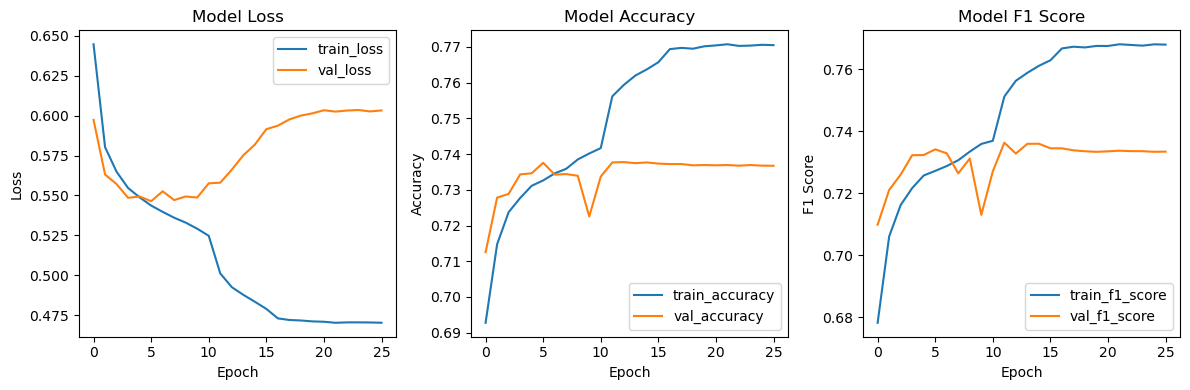

In [5]:
plot_metrics(best_model.history)

# Correlated Binary Encoding

In [ ]:
#FIXME - update the directories to point where you would like
image_directory = "/mnt/sda1/image-results-iris-correlated"
new_dir = image_directory + '/data/'

In [12]:
correlated_order = order_columns_by_correlation(df, classification_id, True)

ordering columns by correlation: Species, 6, ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [13]:
correlated_df = df.reindex(columns=correlated_order)

In [14]:
x = correlated_df.drop([classification_id, 'Id'], axis=1)
Y = correlated_df[classification_id]
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (150, 4)
Y (150,)
This value should be True: True


In [15]:
# FIXME - update the image directory to point to a directory where you want the images to be saved. Create a folder there.
# Change any other constants you want to change
image_directory = "/mnt/sda1/image-results-iris-correlated"
feature_types = get_column_data_types(x)
# For feature_types, 0 = float, 1 = int, 2 = bool
print(feature_types)

[0, 0, 0, 0]


In [16]:
convert_samples_to_binary(x, correlated_df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

In [17]:
organize_photos_in_folders(image_directory, Y)

150
{'setosa': 50, 'versicolor': 50, 'virginica': 50}


In [ ]:
new_dir = image_directory + '/data'
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

In [5]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.0021178958297241477, 'acc': 1.0, 'f1_m': 1.0, 'precision_m': 1.0, 'recall_m': 1.0, 'auc': 1.0, 'false_negatives': 0.0, 'false_positives': 0.0, 'true_negatives': 240.0, 'true_positives': 120.0, 'mean_absolute_error': 0.0013242868444649503, 'mean_squared_error': 0.00014281665536941546, 'val_loss': 0.3948760949075222, 'val_acc': 0.9199999928474426, 'val_f1_m': 0.9166101098060608, 'val_precision_m': 0.9199999928474426, 'val_recall_m': 0.9133333206176758, 'val_auc': 0.9108332991600037, 'val_false_negatives': 5.0, 'val_false_positives': 5.0, 'val_true_negatives': 55.0, 'val_true_positives': 25.0, 'val_mean_absolute_error': 0.06487068757414818, 'val_mean_squared_error': 0.051262075267732146, 'lr': 0.0023049999341310467}


In [6]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.000651675509288907, 'acc': 1.0, 'f1_m': 1.0, 'precision_m': 1.0, 'recall_m': 1.0, 'auc_4': 1.0, 'false_negatives_4': 0.0, 'false_positives_4': 0.0, 'true_negatives_4': 240.0, 'true_positives_4': 120.0, 'mean_absolute_error': 0.0004321309388615191, 'mean_squared_error': 3.8298953768389765e-06, 'val_loss': 0.05403872951865196, 'val_acc': 1.0, 'val_f1_m': 0.9830508232116699, 'val_precision_m': 1.0, 'val_recall_m': 0.9666666388511658, 'val_auc_4': 1.0, 'val_false_negatives_4': 1.0, 'val_false_positives_4': 0.0, 'val_true_negatives_4': 60.0, 'val_true_positives_4': 29.0, 'val_mean_absolute_error': 0.02872484177350998, 'val_mean_squared_error': 0.009663733653724194, 'lr': 0.01}


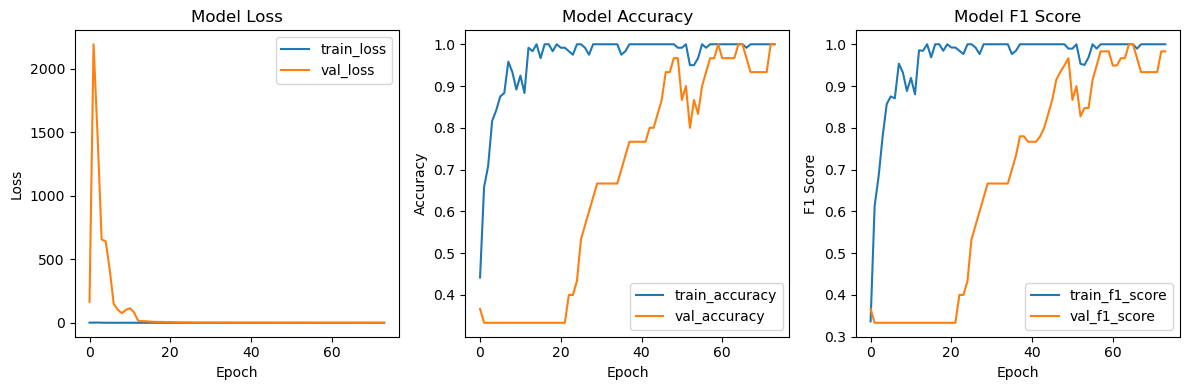

In [7]:
plot_metrics(best_model.history)